In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("nasa_data_file.csv")

In [4]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,Point,"[6.08333, 50.775]",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,Point,"[10.23333, 56.18333]",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,Point,"[-113, 54.21667]",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,Point,"[-99.9, 16.88333]",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,Point,"[-64.95, -33.16667]",NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         1000 non-null   object 
 1   id                           1000 non-null   int64  
 2   nametype                     1000 non-null   object 
 3   recclass                     1000 non-null   object 
 4   mass                         972 non-null    float64
 5   fall                         1000 non-null   object 
 6   year                         999 non-null    object 
 7   reclat                       988 non-null    float64
 8   reclong                      988 non-null    float64
 9   geolocation.type             988 non-null    object 
 10  geolocation.coordinates      988 non-null    object 
 11  :@computed_region_cbhk_fwbd  133 non-null    float64
 12  :@computed_region_nnqa_25f4  134 non-null    float64
dtypes: float64(5), int6

In [6]:
df.isnull().sum()

name                             0
id                               0
nametype                         0
recclass                         0
mass                            28
fall                             0
year                             1
reclat                          12
reclong                         12
geolocation.type                12
geolocation.coordinates         12
:@computed_region_cbhk_fwbd    867
:@computed_region_nnqa_25f4    866
dtype: int64

In [7]:
df.shape

(1000, 13)

## ● Get all the Earth meteorites that fell before the year 2000

In [8]:
# check the null value in year column
df[df['year'].isna() == True]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.0,0.0,Point,"[0, 0]",NaN,NaN


In [9]:
# Create new column 'Year' from 'year' by splitting the year out of it

df["Year"] = df['year'].dropna().apply(lambda x: (x.split("-")[0])).astype(int)

In [10]:
# Filter the meteorites that fell before the year 2000
year_less_than_2000 = df[(df['Year'] < 2000) & (df['fall'] == 'Fell')]

In [11]:
year_less_than_2000.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Year
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,Point,"[6.08333, 50.775]",NaN,NaN,1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,Point,"[10.23333, 56.18333]",NaN,NaN,1951.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,Point,"[-113, 54.21667]",NaN,NaN,1952.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,Point,"[-99.9, 16.88333]",NaN,NaN,1976.0
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,Point,"[-64.95, -33.16667]",NaN,NaN,1902.0


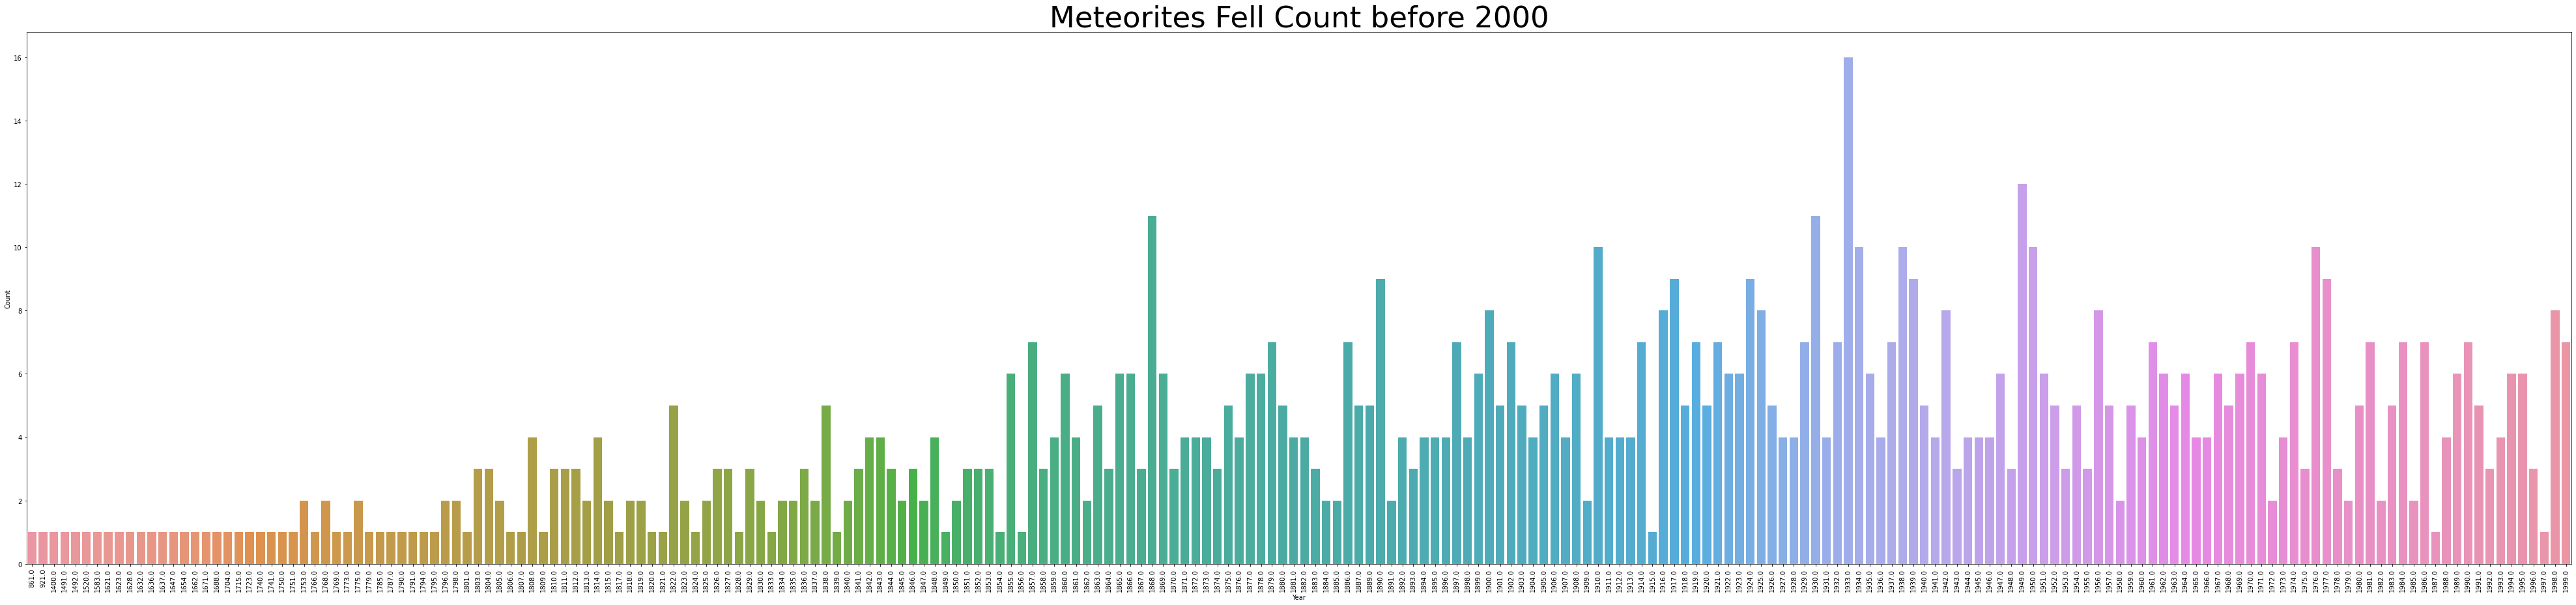

In [12]:
# Plot the countplot of meteorites that fell before the year 2000
plt.figure(figsize=(70, 15))
sns.countplot(data=year_less_than_2000, x='Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Meteorites Fell Count before 2000', fontsize = 45)
plt.xticks(rotation=90)
plt.show()

## ● Get all the earth meteorites co-ordinates who fell before the year 1970

In [13]:
# Filter out the meteorites coordinates fell before the year 1970

earth_meteorites_before_1970 = df[(df['reclat'].notnull()) & (df['reclong'].notnull()) & (df['Year'] < 1970) & (df['fall'] == 'Fell')]

coordinates = earth_meteorites_before_1970[['reclat', 'reclong']]

In [14]:
coordinates

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
994,54.50000,35.20000
995,13.63333,79.41667
997,-7.08333,111.53333
998,-6.66667,106.58333


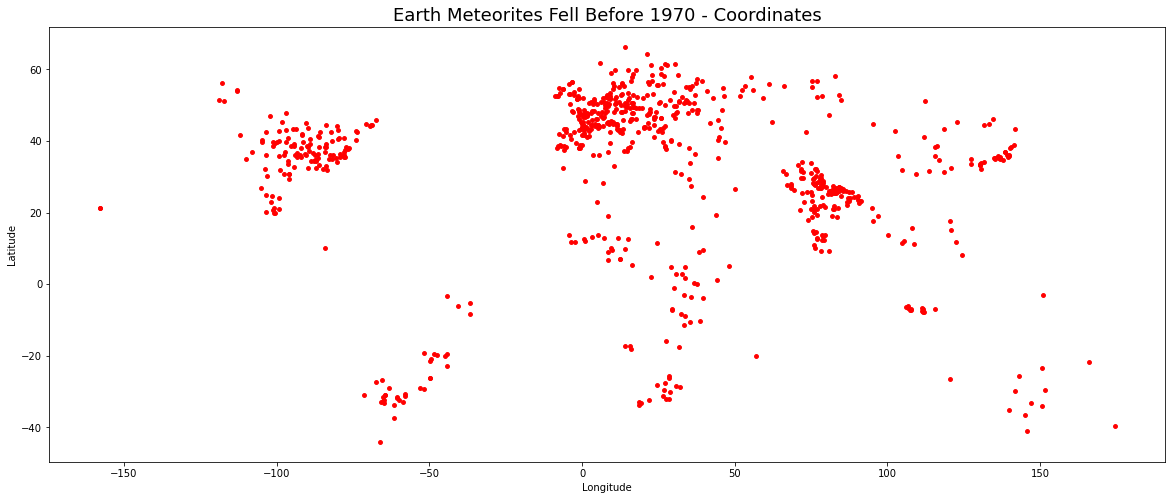

In [15]:
# Create a scatter plot of meteorite coordinates
plt.figure(figsize=(20, 8))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], s=15, c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Fell Before 1970 - Coordinates', fontsize = 18)
plt.show()

## ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [16]:
# Filter the meteorites mass whose mass was more than 10000 kg
high_mass_meteorites = df[df['mass'] > 10000]

In [17]:
high_mass_meteorites.tail()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation.type,geolocation.coordinates,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4,Year
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01T00:00:00.000,49.60000,17.11667,Point,"[17.11667, 49.6]",NaN,NaN,1878.0
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01T00:00:00.000,38.20000,-89.68333,Point,"[-89.68333, 38.2]",34.0,1762.0,1927.0
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01T00:00:00.000,54.50000,35.20000,Point,"[35.2, 54.5]",NaN,NaN,1807.0
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,Point,"[111.53333, -7.08333]",NaN,NaN,1869.0
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,Point,"[106.58333, -6.66667]",NaN,NaN,1922.0


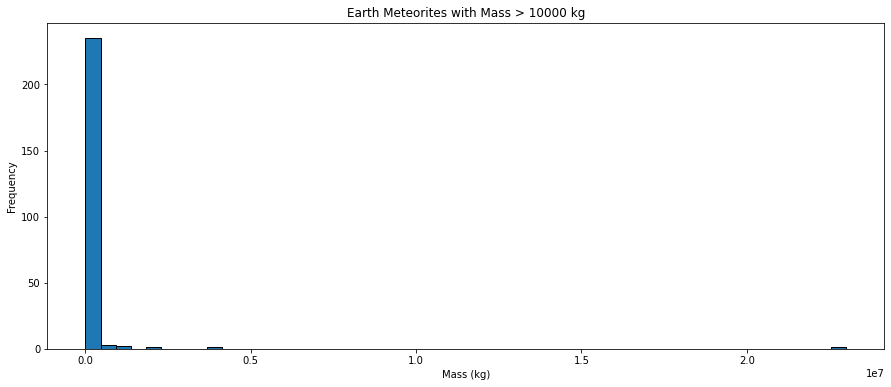

In [18]:
# Create a histogram of meteorite mass
plt.figure(figsize=(15, 6))
plt.hist(high_mass_meteorites['mass'], bins=50, edgecolor='black')
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Earth Meteorites with Mass > 10000 kg')
plt.show()